# 1. Introduction

# Libraries and Data importation

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import full dataframe
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_univariate_final_v2_light.parquet")

# 2. Data Overview

In [5]:
# Shape of the dataset (rows, columns).

In [6]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year,chapter codes,chapter names,LOS_capped,group codes,group names
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001,C00-D48,tumores [neoplasias],2,C76-C80,tumores [neoplasias] malignos de sitios mal de...
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001,E00-E90,"enfermedades endocrinas, nutricionales y metab...",58,E10-E14,diabetes mellitus
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001,J00-J99,enfermedades del sistema respiratorio,12,J09-J18,influenza [gripe] y neumonía
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001,S00-T98,"traumatismos, envenenamientos y algunas otras ...",1,S00-S09,traumatismos de la cabeza
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001,K00-K93,enfermedades del sistema digestivo,7,K80-K87,"trastornos de la vesícula biliar, de las vías ..."


In [7]:
df.shape

(25758741, 15)

# Data dictionary / main variables (categorical, numerical).

In [9]:
# Data type customization really helped to reduce memory usage, increasing speed and capacity to create new columns
# This is before changing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 15 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  category
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    category
 8   primary diagnosis name    category
 9   year                      int32   
 10  chapter codes             category
 11  chapter names             object  
 12  LOS_capped                int32   
 13  group codes               category
 14  group names               category
dtypes: category(11), int32(3), object(1)
memory usage: 885.0+ MB


# Missing values / NA treatment summary.

In [12]:
# Dataframe is cleaned from previous steps
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
chapter codes               0
chapter names               0
LOS_capped                  0
group codes                 0
group names                 0
dtype: int64

# First impressions after univariate analysis (anything noteworthy?).

# List of pairs of variables to perform bivariate analysis (CHECK CHAT GPT CONVERSATION TO HAVE MORE GUIDANCE)

# 3. Bivariate analysis

# 1. Diagnosis and Year

In [17]:
# Prevalence measure: counts of "d" diangosis in "y" year/total amount of discharges "y" year

# Counts per year
year_count = df["year"].value_counts()

# Counts per diagnosis group (ex. diabetes)
df["group codes"].value_counts()



group codes
K80-K87    1508792
J09-J18    1302182
K35-K38     810863
I30-I52     687480
K40-K46     647833
            ...   
T33-T35        192
B95-B98        186
A75-A79         64
A70-A74         32
R95-R99         18
Name: count, Length: 217, dtype: int64

In [19]:
group_counts = df.groupby(['group names', "year"]).size().unstack(level=1).reset_index()

C:\Users\mirko\AppData\Local\Temp\ipykernel_17072\1007824967.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_counts = df.groupby(['group names', "year"]).size().unstack(level=1).reset_index()


In [20]:
group_counts

year,group names,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,otros efectos y los no especificados de causa...,568,1012,1242,735,1199,1314,1134,1139,1162,...,1131,1098,1095,1222,722,1057,1092,1240,1366,1479
1,afecciones asociadas con la regulación tegumen...,305,426,470,234,396,413,487,526,606,...,376,347,377,344,237,324,207,281,190,235
2,afecciones supurativas y necróticas de las vía...,456,598,644,457,634,608,631,577,590,...,640,626,734,690,495,544,620,779,949,1095
3,algunas complicaciones precoces de traumatismos,95,166,155,115,213,188,202,291,267,...,304,315,301,351,258,312,361,367,410,496
4,alteraciones de la visión y ceguera,12,33,53,15,61,48,67,62,70,...,108,100,107,105,46,71,99,112,151,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,tumores malignos de los órganos genitales masc...,2976,3379,4858,5282,4932,4883,4095,4028,4338,...,4528,4600,4872,4909,5071,3845,4596,5225,5549,6050
213,tumores malignos de los órganos respiratorios ...,1283,2060,3232,2163,3353,3197,3102,2976,3237,...,3478,3715,3514,3749,2097,2981,3236,3675,4135,4306
214,"tumores malignos del labio, de la cavidad buca...",379,562,680,491,666,703,691,801,811,...,959,904,997,1059,584,867,1078,1233,1108,1392
215,"tumores malignos del ojo, del encéfalo y de ot...",449,764,1030,669,1065,1043,1066,1090,1220,...,1449,1354,1448,1571,814,1504,1648,1590,1611,1722


In [21]:
prevalence = group_counts.set_index('group names').div(group_counts.drop('group names', axis=1).sum(axis=0), axis=1)



In [22]:
prevalence

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.001391,0.001161,0.001144,0.001392,0.001078,0.001136,0.000999,0.001018,0.000987,0.001035,...,0.000954,0.000937,0.000924,0.000996,0.001202,0.001075,0.000946,0.001006,0.001121,0.001084
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.000747,0.000489,0.000433,0.000443,0.000356,0.000357,0.000429,0.000470,0.000515,0.000574,...,0.000317,0.000296,0.000318,0.000280,0.000395,0.000329,0.000179,0.000228,0.000156,0.000172
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.001117,0.000686,0.000593,0.000866,0.000570,0.000525,0.000556,0.000516,0.000501,0.000590,...,0.000540,0.000534,0.000620,0.000562,0.000824,0.000553,0.000537,0.000632,0.000779,0.000802
algunas complicaciones precoces de traumatismos,0.000233,0.000190,0.000143,0.000218,0.000192,0.000162,0.000178,0.000260,0.000227,0.000249,...,0.000256,0.000269,0.000254,0.000286,0.000430,0.000317,0.000313,0.000298,0.000336,0.000363
alteraciones de la visión y ceguera,0.000029,0.000038,0.000049,0.000028,0.000055,0.000041,0.000059,0.000055,0.000059,0.000054,...,0.000091,0.000085,0.000090,0.000086,0.000077,0.000072,0.000086,0.000091,0.000124,0.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos genitales masculinos,0.007288,0.003877,0.004476,0.010004,0.004435,0.004220,0.003609,0.003599,0.003684,0.003814,...,0.003818,0.003923,0.004113,0.004001,0.008444,0.003909,0.003983,0.004240,0.004553,0.004433
tumores malignos de los órganos respiratorios e intratorácicos,0.003142,0.002363,0.002978,0.004097,0.003015,0.002763,0.002734,0.002659,0.002749,0.002840,...,0.002932,0.003169,0.002967,0.003056,0.003492,0.003031,0.002804,0.002982,0.003393,0.003155
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.000928,0.000645,0.000627,0.000930,0.000599,0.000608,0.000609,0.000716,0.000689,0.000658,...,0.000809,0.000771,0.000842,0.000863,0.000972,0.000881,0.000934,0.001001,0.000909,0.001020


In [23]:
prev_percent = prevalence.loc[:, prevalence.columns != 'group names'] * 100

In [24]:
prev_percent[2002].sort_values(ascending = False).head(20)

group names
influenza [gripe] y neumonía                                                                          6.692985
trastornos de la vesícula biliar, de las vías biliares y del páncreas                                 4.586161
enfermedades del apéndice                                                                             3.456342
hernia                                                                                                2.740798
enfermedades infecciosas intestinales                                                                 2.503774
enfermedades crónicas de las vías respiratorias inferiores                                            2.448247
traumatismos de la cabeza                                                                             2.444232
otras formas de enfermedad del corazón                                                                2.349583
trastornos no inflamatorios de los órganos genitales femeninos                                      

In [25]:
prev_percent.loc["Total"] = prev_percent.sum()

In [63]:
pd.options.display.float_format = "{:.5f}".format

In [27]:
# prev_percent = prev_percent.round(2)

In [61]:
prev_percent

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.14,0.12,0.11,0.14,0.11,0.11,0.10,0.10,0.10,0.10,...,0.10,0.09,0.09,0.10,0.12,0.11,0.09,0.10,0.11,0.11
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.07,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.05,0.06,...,0.03,0.03,0.03,0.03,0.04,0.03,0.02,0.02,0.02,0.02
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.11,0.07,0.06,0.09,0.06,0.05,0.06,0.05,0.05,0.06,...,0.05,0.05,0.06,0.06,0.08,0.06,0.05,0.06,0.08,0.08
algunas complicaciones precoces de traumatismos,0.02,0.02,0.01,0.02,0.02,0.02,0.02,0.03,0.02,0.02,...,0.03,0.03,0.03,0.03,0.04,0.03,0.03,0.03,0.03,0.04
alteraciones de la visión y ceguera,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos respiratorios e intratorácicos,0.31,0.24,0.30,0.41,0.30,0.28,0.27,0.27,0.27,0.28,...,0.29,0.32,0.30,0.31,0.35,0.30,0.28,0.30,0.34,0.32
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.09,0.06,0.06,0.09,0.06,0.06,0.06,0.07,0.07,0.07,...,0.08,0.08,0.08,0.09,0.10,0.09,0.09,0.10,0.09,0.10
"tumores malignos del ojo, del encéfalo y de otras partes del sistema nervioso central",0.11,0.09,0.09,0.13,0.10,0.09,0.09,0.10,0.10,0.11,...,0.12,0.12,0.12,0.13,0.14,0.15,0.14,0.13,0.13,0.13


In [37]:
prevalence = prevalence.copy()
prevalence["mean"] = prevalence.mean(axis=1)

In [38]:
prevalence["mean"].describe()

count    2.170000e+02
mean     4.608295e-03
std      7.520794e-03
min      6.320666e-07
25%      5.619815e-04
50%      1.600770e-03
75%      5.649492e-03
max      5.635645e-02
Name: mean, dtype: float64

In [41]:
threshold = prevalence["mean"].quantile(0.10)
prevalence_filtered = prevalence[prevalence["mean"] >= threshold].copy()
prevalence_filtered["std"] = prevalence_filtered.select_dtypes(include='number').drop(columns=["mean"]).std(axis=1)
prevalence_filtered["CV"] = prevalence_filtered["std"] / prevalence_filtered["mean"]

In [65]:
prevalence_filtered

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2018,2019,2020,2021,2022,2023,2024,mean,std,CV
group names,,,,,,,,,,,,,,,,,,,,,
otros efectos y los no especificados de causas externas,0.00139,0.00116,0.00114,0.00139,0.00108,0.00114,0.00100,0.00102,0.00099,0.00104,...,0.00100,0.00120,0.00107,0.00095,0.00101,0.00112,0.00108,0.00106,0.00013,0.12486
afecciones asociadas con la regulación tegumentaria y la temperatura del feto y del recién nacido,0.00075,0.00049,0.00043,0.00044,0.00036,0.00036,0.00043,0.00047,0.00051,0.00057,...,0.00028,0.00039,0.00033,0.00018,0.00023,0.00016,0.00017,0.00037,0.00014,0.36765
afecciones supurativas y necróticas de las vías respiratorias inferiores,0.00112,0.00069,0.00059,0.00087,0.00057,0.00053,0.00056,0.00052,0.00050,0.00059,...,0.00056,0.00082,0.00055,0.00054,0.00063,0.00078,0.00080,0.00062,0.00015,0.24730
algunas complicaciones precoces de traumatismos,0.00023,0.00019,0.00014,0.00022,0.00019,0.00016,0.00018,0.00026,0.00023,0.00025,...,0.00029,0.00043,0.00032,0.00031,0.00030,0.00034,0.00036,0.00025,0.00007,0.26723
anemias aplásticas y otras anemias,0.00191,0.00241,0.00216,0.00212,0.00238,0.00244,0.00244,0.00258,0.00263,0.00261,...,0.00303,0.00261,0.00336,0.00306,0.00290,0.00274,0.00279,0.00267,0.00034,0.12762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tumores malignos de los órganos genitales masculinos,0.00729,0.00388,0.00448,0.01000,0.00443,0.00422,0.00361,0.00360,0.00368,0.00381,...,0.00400,0.00844,0.00391,0.00398,0.00424,0.00455,0.00443,0.00458,0.00162,0.35332
tumores malignos de los órganos respiratorios e intratorácicos,0.00314,0.00236,0.00298,0.00410,0.00302,0.00276,0.00273,0.00266,0.00275,0.00284,...,0.00306,0.00349,0.00303,0.00280,0.00298,0.00339,0.00315,0.00298,0.00034,0.11398
"tumores malignos del labio, de la cavidad bucal y de la faringe",0.00093,0.00064,0.00063,0.00093,0.00060,0.00061,0.00061,0.00072,0.00069,0.00066,...,0.00086,0.00097,0.00088,0.00093,0.00100,0.00091,0.00102,0.00079,0.00013,0.16852


In [77]:
top10_CV = prevalence_filtered.sort_values(by = "CV", ascending = False).head(10)

In [79]:
top10_CV

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2018,2019,2020,2021,2022,2023,2024,mean,std,CV
group names,,,,,,,,,,,,,,,,,,,,,
asignación provisoria de nuevas afecciones de etiología incierta,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.05037,0.07374,0.01898,0.00388,0.00224,0.00622,0.01797,2.89021
obesidad y otros tipos de hiperalimentación,0.00013,0.00043,0.00223,0.00087,0.00197,0.00206,0.00229,0.00358,0.00465,0.00572,...,0.00661,0.00345,0.00691,0.00934,0.01711,0.01879,0.02153,0.00654,0.00555,0.84870
desnutrición,0.00261,0.00199,0.00139,0.00119,0.00086,0.00079,0.00074,0.00063,0.00056,0.00050,...,0.00037,0.00038,0.00032,0.00030,0.00036,0.00032,0.00031,0.00069,0.00058,0.83294
infecciones del sistema nervioso central,0.00107,0.00105,0.00129,0.00117,0.00165,0.00331,0.00137,0.00067,0.00075,0.00070,...,0.00064,0.00075,0.00046,0.00033,0.00035,0.00041,0.00046,0.00091,0.00061,0.67409
"personas con riesgos potenciales para su salud, relacionados con su historia familiar y personal, y algunas condiciones que influyen sobre su estado de salud",0.00156,0.00215,0.00200,0.00149,0.00196,0.00250,0.00242,0.00240,0.00211,0.00210,...,0.00032,0.00002,0.00000,0.00000,0.00000,0.00000,0.00000,0.00162,0.00109,0.67337
glaucoma,0.00186,0.00178,0.00125,0.00124,0.00133,0.00129,0.00127,0.00139,0.00125,0.00114,...,0.00039,0.00035,0.00030,0.00019,0.00017,0.00014,0.00015,0.00083,0.00054,0.64647
enfermedad cardiopulmonar y enfermedades de la circulación pulmonar,0.00062,0.00079,0.00094,0.00093,0.00107,0.00104,0.00103,0.00109,0.00116,0.00131,...,0.00287,0.00314,0.00477,0.00491,0.00423,0.00432,0.00438,0.00220,0.00139,0.63325
"personas con riesgos potenciales para su salud, relacionados con enfermedades transmisibles",0.00015,0.00016,0.00010,0.00010,0.00010,0.00012,0.00016,0.00019,0.00022,0.00059,...,0.00031,0.00022,0.00035,0.00038,0.00039,0.00050,0.00073,0.00027,0.00016,0.60623
personas en contacto con los servicios de salud por otras circunstancias,0.00285,0.00483,0.00320,0.00142,0.00310,0.00283,0.00333,0.00315,0.00316,0.00369,...,0.00083,0.00064,0.00124,0.00081,0.00120,0.00079,0.00069,0.00198,0.00120,0.60486


In [97]:
plot_top10 = top10_CV.iloc[:, 0:24]

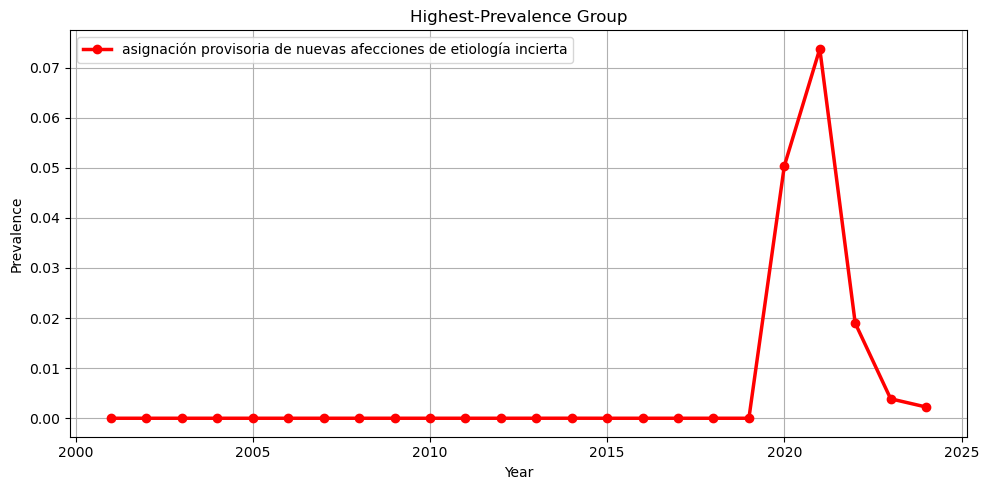

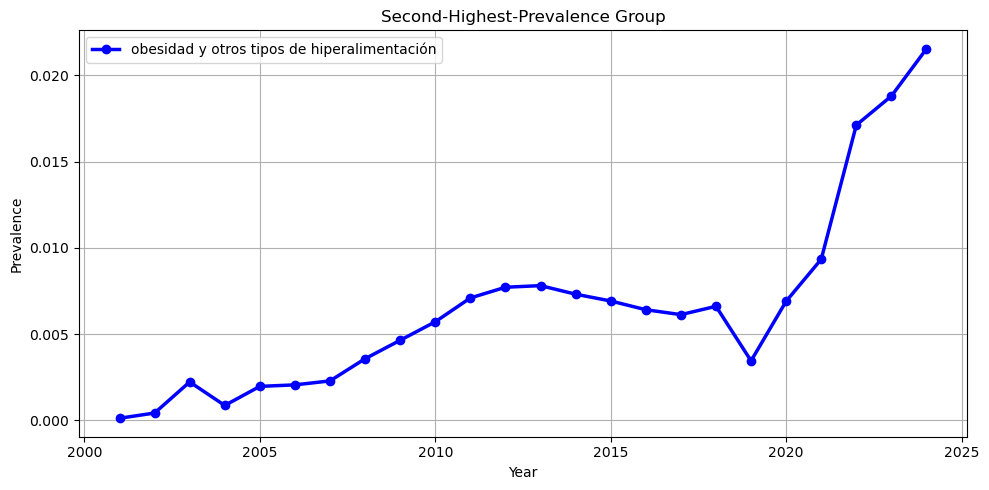

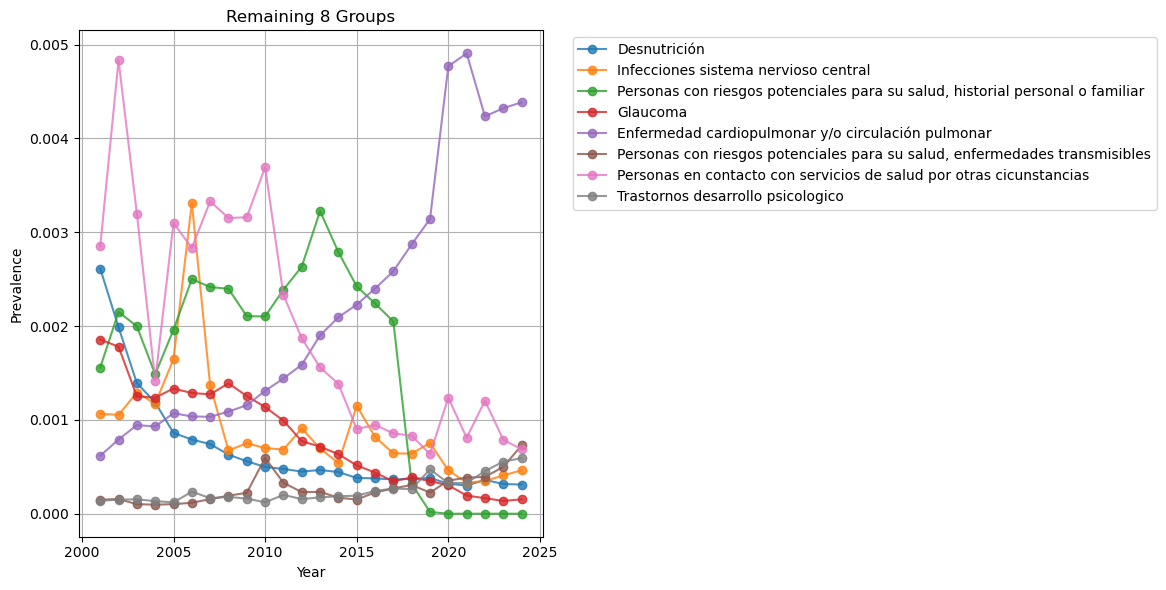

In [135]:
import matplotlib.pyplot as plt

# --- Manually specify the groups ---
highest_group = "asignación provisoria de nuevas afecciones de etiología incierta"
second_highest_group = "obesidad y otros tipos de hiperalimentación"  # replace with the actual second-highest group
other_groups = plot_top10.drop([highest_group, second_highest_group])

# Custom labels for the remaining 8 groups
custom_labels_other8 = [
    "Desnutrición",
    "Infecciones sistema nervioso central",
    "Personas con riesgos potenciales para su salud, historial personal o familiar",
    "Glaucoma",
    "Enfermedad cardiopulmonar y/o circulación pulmonar",
    "Personas con riesgos potenciales para su salud, enfermedades transmisibles",
    "Personas en contacto con servicios de salud por otras cicunstancias",
    "Trastornos desarrollo psicologico"
]

# --- Plot 1: Highest-prevalence group ---
plt.figure(figsize=(10,5))
plt.plot(plot_top10.columns, plot_top10.loc[highest_group],
         color='red', marker='o', linewidth=2.5, label=highest_group)
plt.title("Highest-Prevalence Group")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 2: Second-highest-prevalence group ---
plt.figure(figsize=(10,5))
plt.plot(plot_top10.columns, plot_top10.loc[second_highest_group],
         color='blue', marker='o', linewidth=2.5, label=second_highest_group)
plt.title("Second-Highest-Prevalence Group")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# --- Plot 3: Remaining 8 groups ---
plt.figure(figsize=(12,6))
for i, group in enumerate(other_groups.index):
    label = custom_labels_other8[i] if i < len(custom_labels_other8) else group
    plt.plot(plot_top10.columns, other_groups.loc[group],
             marker='o', linewidth=1.5, alpha=0.8, label=label)
plt.title("Remaining 8 Groups")
plt.xlabel("Year")
plt.ylabel("Prevalence")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [143]:
top10_mean = prevalence.sort_values(by = "mean", ascending = False).head(10)

In [151]:
plot_top10_mean = top10_mean.iloc[:, 0:24] * 100

In [157]:
plot_top10_mean

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
group names,,,,,,,,,,,,,,,,,,,,,
"trastornos de la vesícula biliar, de las vías biliares y del páncreas",2.36239,4.58616,4.70279,2.80750,4.67960,4.77339,5.03054,5.19231,5.22527,5.37035,...,6.67826,6.85527,6.92708,6.72889,4.38678,6.82807,7.29091,7.24195,6.56891,6.50362
influenza [gripe] y neumonía,8.84952,6.69298,5.99276,7.12206,6.39967,5.68625,6.17827,5.30337,6.36593,6.39866,...,4.68493,4.90009,4.57564,4.27374,4.67334,2.91419,2.27119,3.02951,4.16546,4.34996
enfermedades del apéndice,3.84580,3.45634,3.47152,4.03217,3.61891,3.49484,3.37302,3.37204,3.32330,3.38539,...,3.18956,3.00087,2.97281,2.82574,3.18410,3.37749,2.85087,2.44747,2.34528,2.24392
otras formas de enfermedad del corazón,2.39765,2.34958,2.24613,2.59120,2.31291,2.34534,2.52303,2.54764,2.55400,2.69410,...,2.80931,2.78269,2.88611,2.84457,3.04707,2.97905,2.69713,2.83947,2.98305,2.88266
hernia,3.25140,2.74080,2.68967,3.31547,2.66549,2.38907,2.31978,2.41630,2.35265,2.21901,...,2.59954,2.63812,2.67006,2.65442,3.13615,1.97407,2.32917,2.65260,2.35726,2.32825
otras enfermedades de las vías respiratorias superiores,1.98425,1.87508,2.53507,2.80863,2.46542,2.42779,2.55890,2.58374,2.59332,2.44741,...,2.55493,2.52945,2.41104,2.58743,2.50909,1.62952,1.66891,1.98673,1.91404,2.40489
enfermedades cerebrovasculares,1.76750,1.75427,1.60571,1.71749,1.58852,1.72391,1.94370,2.07088,2.04218,2.15263,...,2.32906,2.35460,2.32121,2.32938,2.56753,2.67110,2.43836,2.44544,2.58659,2.60586
enfermedades de los órganos genitales masculinos,3.38684,1.62830,1.92809,3.92724,1.80352,1.70395,1.65055,1.75272,1.70606,1.68045,...,1.93700,1.96046,2.01821,2.06996,4.13586,1.85370,2.10229,2.21783,1.97533,2.12194
trastornos no inflamatorios de los órganos genitales femeninos,0.00000,2.24392,2.57349,0.00000,2.67250,2.48734,2.47376,2.44623,2.37363,2.26170,...,2.18556,2.20901,2.29057,2.24274,0.00000,1.77155,2.04033,2.19381,2.19399,2.25125


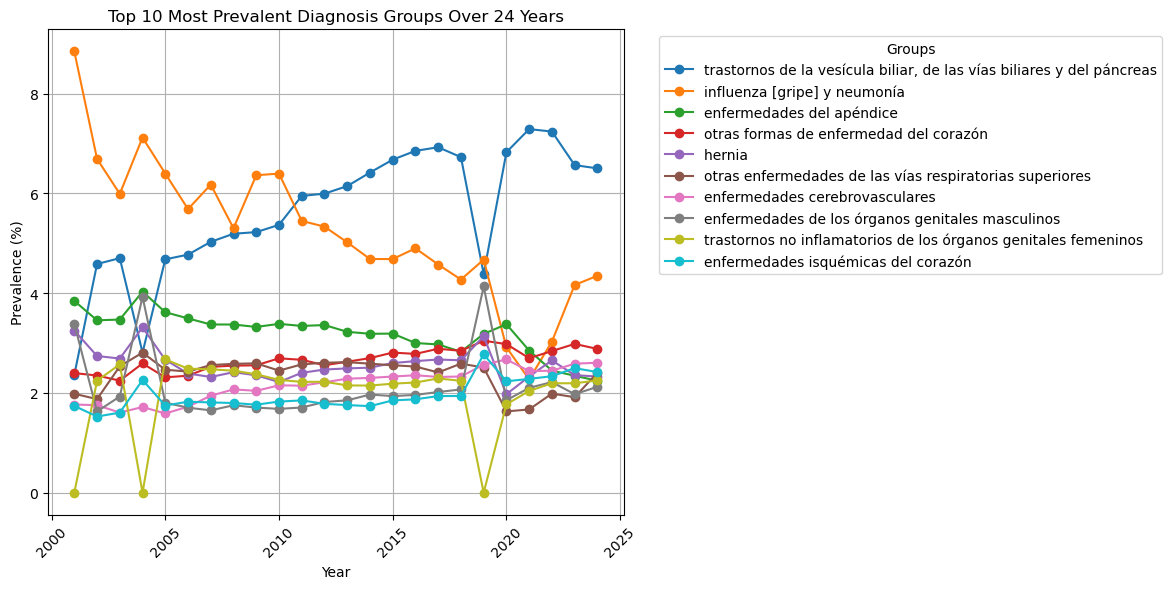

In [155]:
import matplotlib.pyplot as plt

# Plot all top 10 groups
plt.figure(figsize=(12, 6))

for group in plot_top10_mean.index:
    plt.plot(plot_top10_mean.columns, plot_top10_mean.loc[group], marker='o', label=group)

plt.title("Top 10 Most Prevalent Diagnosis Groups Over 24 Years")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")  # if your values are already percentages
plt.xticks(rotation=45)
plt.legend(title="Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Counts / Frequencies

# Proportions

# Central Tendency & Spread (Numerical vs Categorical)

# Balance & Concentration

# Context / Interpretation

# Guiding Questions

# Visualizations

# Questions

# Insights

# Ideas or considerations